<a href="https://colab.research.google.com/github/ektakarmakar-analyst/SCT_DS_4/blob/main/Road_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium.plugins import HeatMap


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/US_Accidents_March23.csv', nrows=0).columns.tolist()

In [ ]:
df1

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [ ]:
# Load only necessary columns
cols = ['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng',
        'City', 'State', 'Weather_Condition', 'Temperature(F)', 'Humidity(%)',
        'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)',
        'Amenity', 'Crossing', 'Junction', 'Traffic_Signal', 'Sunrise_Sunset']

df = pd.read_csv('/content/drive/MyDrive/US_Accidents_March23.csv', usecols=cols, low_memory=False)


In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')


df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day_name()

df.dropna(subset=['Start_Lat', 'Start_Lng', 'Start_Time'], inplace=True)


/tmp/ipython-input-6-3500427367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='magma')


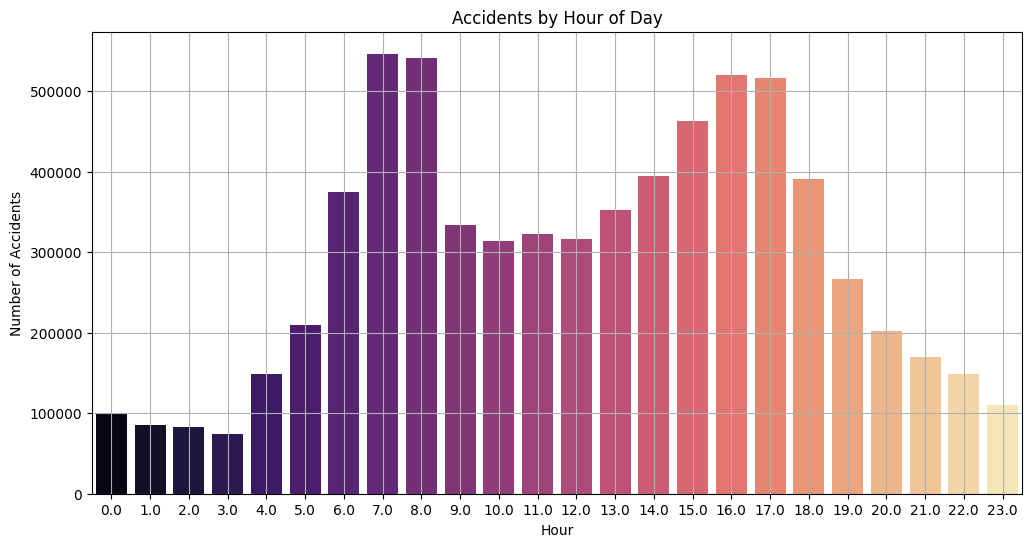

/tmp/ipython-input-6-3500427367.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Weather_Condition', data=df[df['Weather_Condition'].isin(top_weather)], order=top_weather, palette='coolwarm')


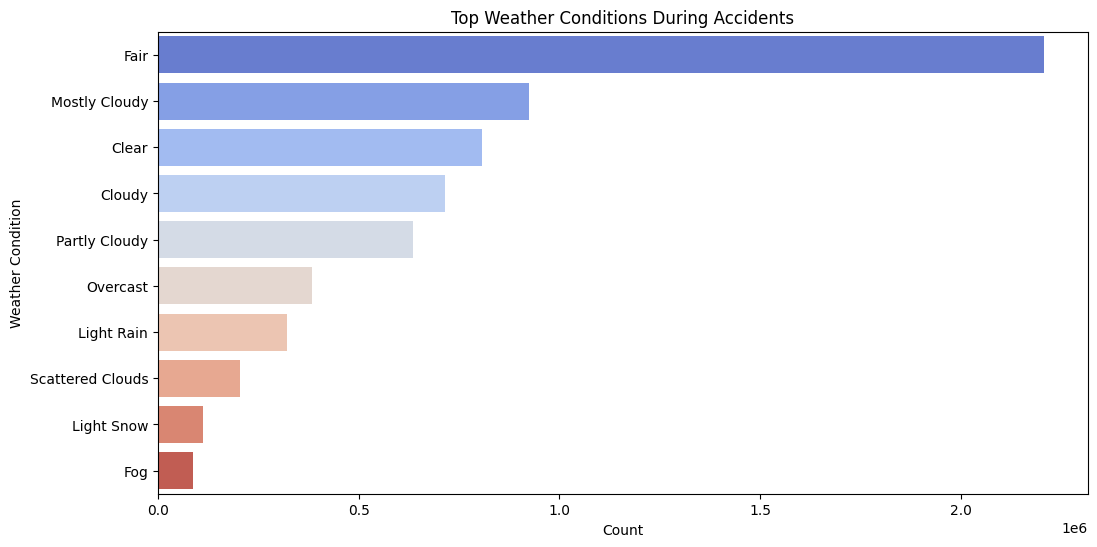

/tmp/ipython-input-6-3500427367.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=df, palette='Set2')


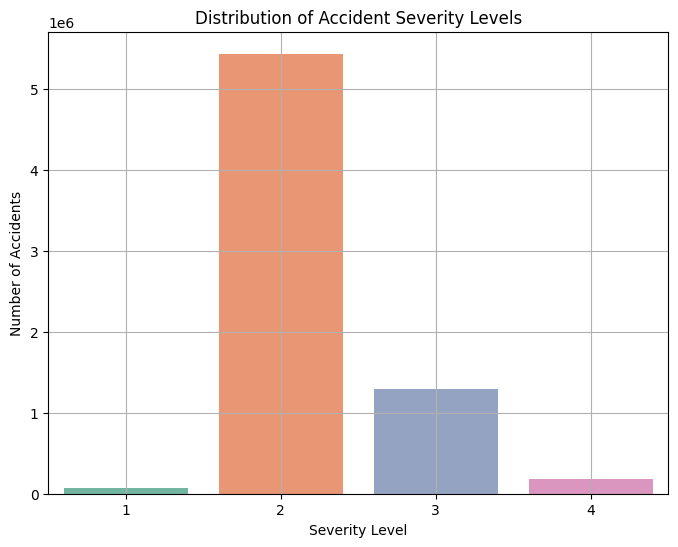

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df, palette='magma')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
top_weather = df['Weather_Condition'].value_counts().nlargest(10).index
sns.countplot(y='Weather_Condition', data=df[df['Weather_Condition'].isin(top_weather)], order=top_weather, palette='coolwarm')
plt.title("Top Weather Conditions During Accidents")
plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='Severity', data=df, palette='Set2')
plt.title("Distribution of Accident Severity Levels")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()


In [ ]:
heat_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(n=5000, random_state=1)
heat_map = folium.Map(location=[heat_df['Start_Lat'].mean(), heat_df['Start_Lng'].mean()], zoom_start=5)
HeatMap(heat_df.values, radius=6).add_to(heat_map)

# Display map directly in notebook
heat_map



Amenity Impact:
Amenity
False    6897635
True       87593
Name: count, dtype: int64


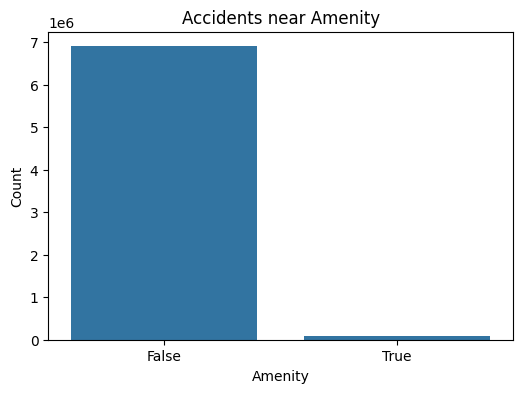


Crossing Impact:
Crossing
False    6177210
True      808018
Name: count, dtype: int64


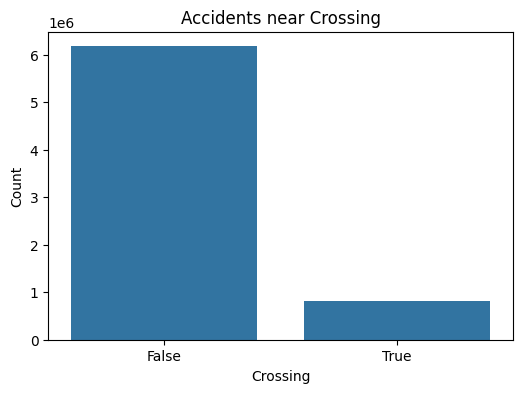


Junction Impact:
Junction
False    6464626
True      520602
Name: count, dtype: int64


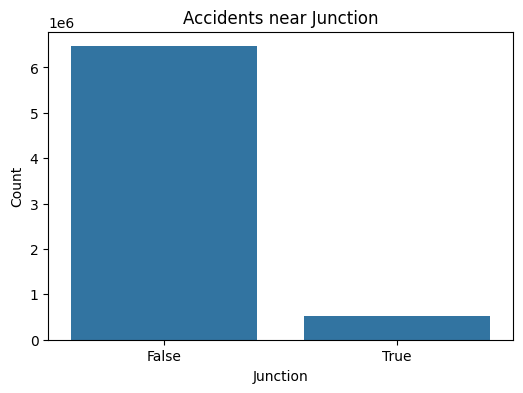


Traffic_Signal Impact:
Traffic_Signal
False    5897025
True     1088203
Name: count, dtype: int64


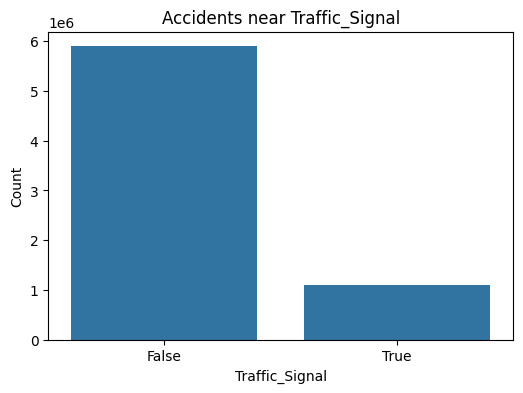

In [ ]:
contributing_cols = ['Amenity', 'Crossing', 'Junction', 'Traffic_Signal']

for col in contributing_cols:
    print(f"\n{col} Impact:")
    print(df[col].value_counts())
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Accidents near {col}')
    plt.ylabel('Count')
    plt.show()